In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
dataset = pd.read_csv('Starbucks Dataset.csv', index_col=0)
dataset.head()

,gender,age,id,became_member_on,income,year,month,person,event,amount,time,offer_id,generation,reward,channels,difficulty,duration,offer_type
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18,NaN,middle,NaN,NaN,NaN,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,32.28,144,NaN,middle,NaN,NaN,NaN,NaN,NaN
2,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,NaN,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,middle,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,NaN,504,3f207df678b143eea3cee63160fa8bed,middle,0.0,"['web', 'email', 'mobile']",0.0,4.0,informational
5,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer completed,NaN,528,9b98b8c7a33c4b65b9aebfe6a799e6d9,middle,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo


In [4]:
dataset.shape

(219915, 18)

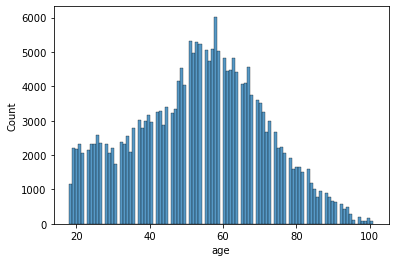

In [6]:
#Let's check the distribution of the age in the dataset
sns.histplot(data=dataset, x='age')
plt.show()

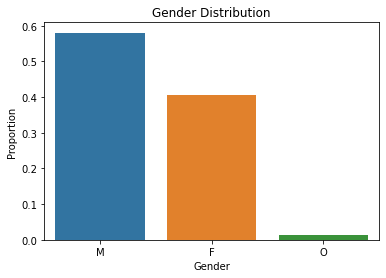

In [7]:
#lets check the gender distribution
sns.barplot(x=dataset['gender'].value_counts().index, y=dataset['gender'].value_counts(normalize=True))
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()

Male proportion is high in our dataset compared to the other groups.

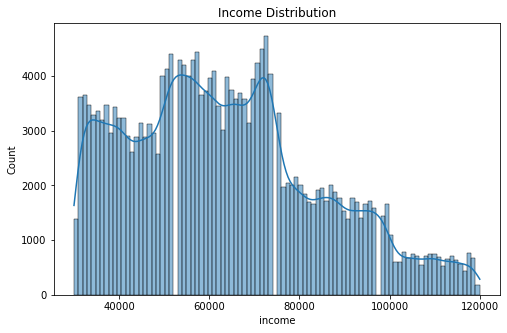

In [8]:
#lets check the income distribution of the people in our dataset
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
sns.histplot(ax=axes, data=dataset, x='income', kde=True)
axes.set_title('Income Distribution')
plt.show()

In [9]:
print('Average income is: {}'.format(round(dataset['income'].mean(), 3)))
print('Median income is: {}'.format(dataset['income'].median()))

Average income is: 63603.119
Median income is: 61000.0


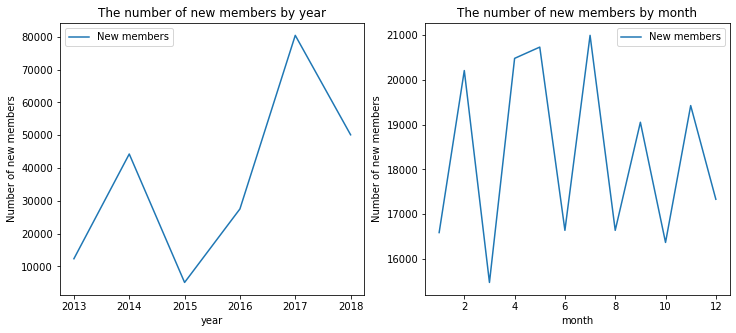

In [10]:
#Distribution of the members wrt to the year and month
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, col in enumerate(['year', 'month']):
    sns.lineplot(ax=axes[i], x=dataset[col].unique(), y=dataset[col].value_counts(), label='New members')
    axes[i].set_title(f'The number of new members by {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Number of new members')
plt.show()

The number of new members increased drastically after 2016 and most of the members joined in the months of february, april, may and July.

In [17]:
#Lets find the average amount spent by a person
transaction = dataset.loc[dataset['event'] == 'transaction']
mean_amount_by_id = pd.pivot_table(data=transaction, values='amount', index='id', aggfunc='mean').reset_index()
mean_amount_by_id = mean_amount_by_id.merge(right=transaction.drop(['amount', 'time'], axis=1), how='left', on='id')
mean_amount_by_id.head()

,id,amount,gender,age,became_member_on,income,year,month,person,event,offer_id,generation,reward,channels,difficulty,duration,offer_type
0,0009655768c64bdeb2e877511632db8f,18.93,M,33,2017-04-21,72000.0,2017,4,0009655768c64bdeb2e877511632db8f,transaction,NaN,youth,NaN,NaN,NaN,NaN,NaN
1,0009655768c64bdeb2e877511632db8f,18.93,M,33,2017-04-21,72000.0,2017,4,0009655768c64bdeb2e877511632db8f,transaction,NaN,youth,NaN,NaN,NaN,NaN,NaN
2,0009655768c64bdeb2e877511632db8f,18.93,M,33,2017-04-21,72000.0,2017,4,0009655768c64bdeb2e877511632db8f,transaction,NaN,youth,NaN,NaN,NaN,NaN,NaN
3,0009655768c64bdeb2e877511632db8f,18.93,M,33,2017-04-21,72000.0,2017,4,0009655768c64bdeb2e877511632db8f,transaction,NaN,youth,NaN,NaN,NaN,NaN,NaN
4,0009655768c64bdeb2e877511632db8f,18.93,M,33,2017-04-21,72000.0,2017,4,0009655768c64bdeb2e877511632db8f,transaction,NaN,youth,NaN,NaN,NaN,NaN,NaN


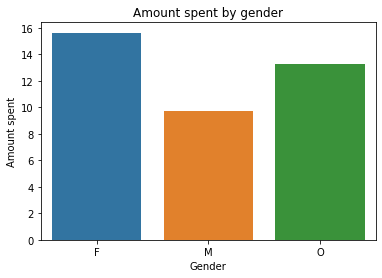

In [19]:
#Below is the average amount spent by a person grouped by gender
gby_gender = mean_amount_by_id.groupby(by='gender').mean()['amount']
sns.barplot(x=gby_gender.index, y=gby_gender)
plt.title('Amount spent by gender')
plt.xlabel('Gender')
plt.ylabel('Amount spent')
plt.show()

Females spent more on a whole.

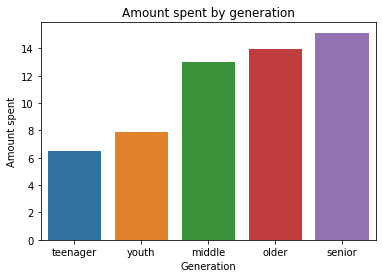

In [20]:
#Below is the graph of average spends grouped by generation
gby_generation = mean_amount_by_id.groupby(by='generation').mean()['amount']
sns.barplot(x=gby_generation.index, y=gby_generation, order=['teenager', 'youth', 'middle', 'older', 'senior'])
plt.title('Amount spent by generation')
plt.xlabel('Generation')
plt.ylabel('Amount spent')
plt.show()

Middle aged people spent more compared to the youth and teenagers.

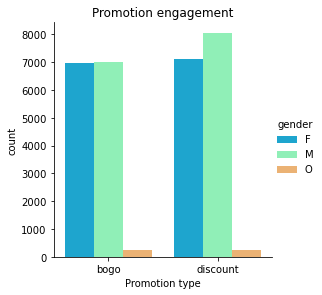

In [22]:
#Distribution of gender and promotion type
dataset['amount'] = dataset['amount'].fillna(method='ffill')
offer_completed = dataset.loc[dataset['event'] == 'offer completed']
sns.catplot(x="offer_type", kind="count", palette="rainbow", hue = "gender", data=offer_completed, height = 4)
plt.title('Promotion engagement')
plt.xlabel('Promotion type')
plt.show()

Males used more discounts compared to females. Interestingly, customers engaged more in the discount promotion than the bogo promotion.

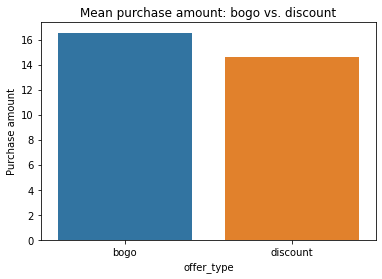

In [23]:
#Distribution of mean purchase amount of bogo vs discount
gby_offer_type = offer_completed.groupby(by='offer_type').mean()['amount']
sns.barplot(x=gby_offer_type.index, y=gby_offer_type)
plt.title('Mean purchase amount: bogo vs. discount')
plt.ylabel('Purchase amount')
plt.show()

In spite of little less engagement, bogo shows little higher mean purchase amount than discount.
It might be the effect of the 'difficulty'. The 'difficulty'(a.k.a. the minimum required spend) might affect the promotion engagement.

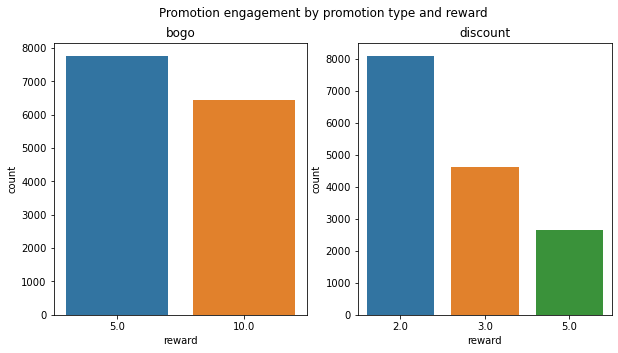

In [24]:
#Does the reward of the promotion make people react differently?
bogo = offer_completed.loc[offer_completed['offer_type'] == 'bogo']
discount = offer_completed.loc[offer_completed['offer_type'] == 'discount']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(ax=axes[0], data=bogo, x='reward')
sns.countplot(ax=axes[1], data=discount, x='reward')
plt.suptitle('Promotion engagement by promotion type and reward')
axes[0].set_title('bogo')
axes[1].set_title('discount')
plt.show()

 The lower reward, the more engagements regardless of the promotion type.
In the same mannar, the 'difficulty' might affect the result. 

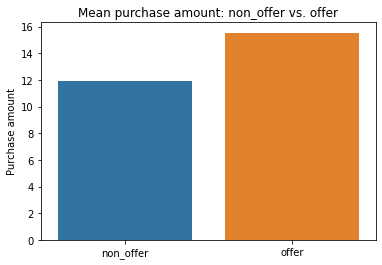

In [25]:
#Does it make sense to offer certain rewards?
history_non_offer = dataset.loc[dataset['event'] == 'transaction']
history_offer = dataset.loc[dataset['event'] == 'offer completed']

sns.barplot(x=['non_offer', 'offer'], y=[history_non_offer['amount'].mean(), history_offer['amount'].mean()])
plt.title('Mean purchase amount: non_offer vs. offer')
plt.ylabel('Purchase amount')
plt.show()

There are about $7.5 of mean purchase amount difference between 'non_offer' and 'offer'.
Although engaging the promotions needs the minimum required purchase amount(a.k.a. 'difficulty' in our dataset), the difference is pretty significant. 

To increase the sales we need to increase the offers and increase the minimum required purchase amount slightly as there are many men who crave for discounts.
Put more offers for less reward points.